<a href="https://colab.research.google.com/github/claudiogaytan28/claudiogaytan28/blob/main/Simulacion2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monte carlo en probabilidad, variables antiteticas y de control



**1.    Sean $X_i, i = 1,...,5 $ variables aleatorias exponenciales independientes, cada una con media 1, y considere la cantidad $θ$ definida por**

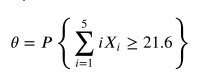

-----

**a) Explique cómo podemos utilizar la simulación para estimar $θ$.**

Se tiene que simular variables aleatorias a partir de una uniforme 0,1, para despues hacer la suma ponderada y filtrar los casos que cumplen con la condicion de ser mayores o iguales a 21.6. Para finalizar usando la definicion de probabilidad clasica que es # casos que cumplen / # casos totales.

In [ ]:
P3 <- replicate(m/2,-log(runif(1:5))*1:5)
mean(apply(P3,2,sum)>=21.6)

[1] 0.16796


---

**b) Dé el estimador mediante variables antitéticas.**

In [ ]:
m <- 100000

P2 <- replicate(m,1/2*(
      I(sum(-log(runif(5))*1:5)>=21.6)+
        I(sum(-log(1-runif(5))*1:5)>=21.6)))

mean(P2)

[1] 0.16941


---


**c) ¿En este caso es eficiente el uso de variables antitéticas?**

In [ ]:
start_time <- Sys.time()
## Variables antiteticas
m <- 100000

P2 <- replicate(m,1/2*(
      I(sum(-log(runif(5))*1:5)>=21.6)+
        I(sum(-log(1-runif(5))*1:5)>=21.6)))

mean(P2)
end_time <- Sys.time()
end_time - start_time

start_time <- Sys.time()
## Sin variables antiteticas
P3 <- replicate(m/2,-log(runif(1:5))*1:5)
mean(apply(P3,2,sum)>=21.6)
end_time <- Sys.time()
end_time - start_time

[1] 0.16906

Time difference of 1.976152 secs

[1] 0.16834

Time difference of 0.4177279 secs

Se tiene que con las variables antiteticas se vuelve mas tardado el proceso, por lo que lo hace mas ineficiente en este caso.



---


**2.    Sean $X $ y $ Y $ variables normales independientes cada una con media 1 y varianza 1, sea $θ$ = $E[e^{XY}]$**

**a) Explique cómo podemos utilizar la simulación para estimar $θ$.**

Se tiene que simular variables aleatorias a partir de una uniforme 0,1, para despues hacer la suma ponderada y despues obtener la media de las simulaciones, pasandolas por $ e^{XY} $. 

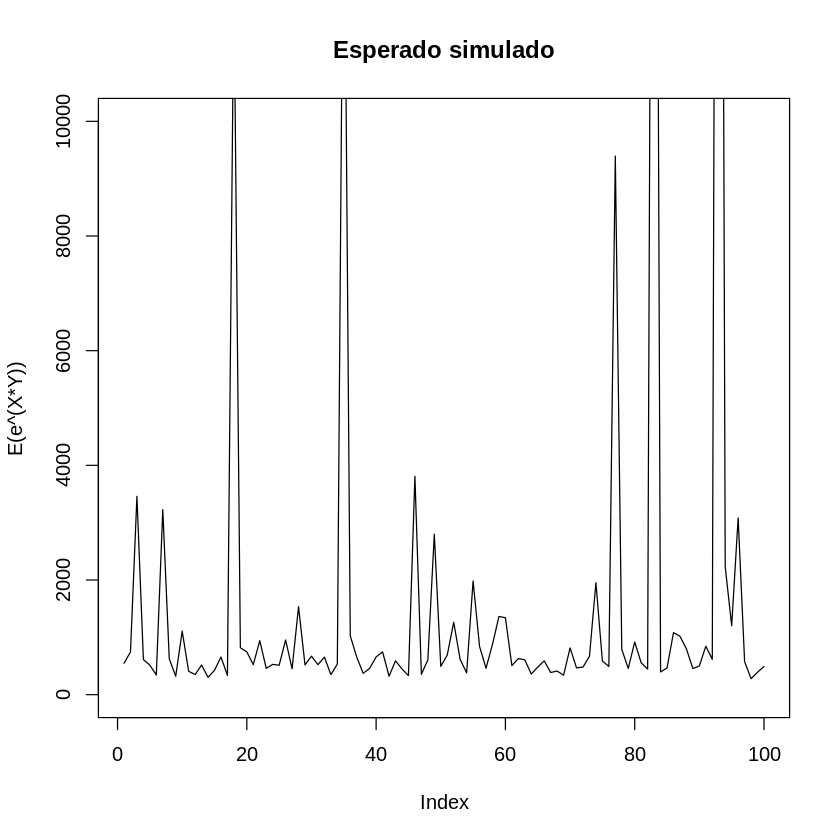

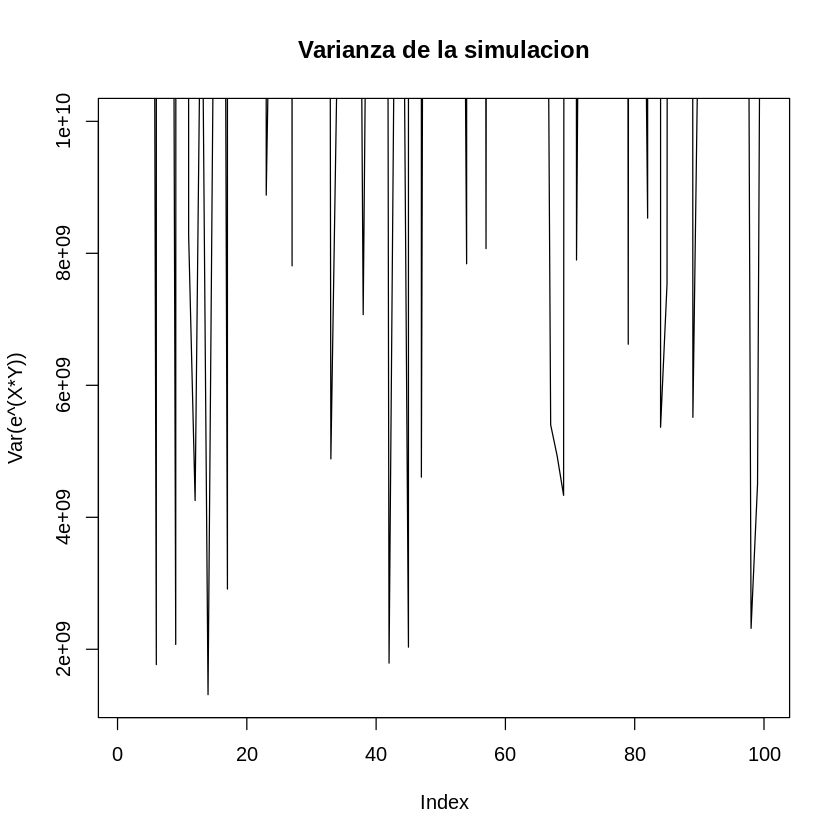

In [ ]:
esperado <- function(m){
  u1 <- runif(m)
  u2 <- runif(m)
  X <- qnorm( u1 , mean = 1, sd = 1)
  Y <- qnorm( u2 , mean = 1, sd = 1)
  E <- mean(exp(X*Y))
  v <- var(exp(X*Y))
  return(c(E, v) )
}

e <- replicate(100,esperado(1000000))
plot(e[1,], type="l", ylim=c(0,10000), main = "Esperado simulado", ylab = "E(e^(X*Y))")
plot(e[2,], type="l", ylim=c(min(e[2,]),10000000000), main = "Varianza de la simulacion", ylab = "Var(e^(X*Y))")




In [ ]:
cat("Esperado minimo : ",min(e[2,]))
cat("\nEsperado maximo : ",max(e[2,]))

Esperado minimo :  1312150097
Esperado maximo :  1.261089e+15

Se tienen grandes cantidades de varianza, ademas que los esperados fluctuan de gran manera al usar la estimacion de montecarlo simple.



---


**b) Dé una variable de control y explique la forma de emplearla para obtener un estimador con una varianza menor que la del estimador de simulación en bruto del inciso a) .**

Se hace la siguiente estimacion donde: 


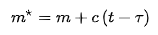

$ m* $ es la aproximacion de $E[e^{XY}]$

$ m $ es 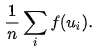 en donde $ u_i $ es la simulacion de las variables aleatorias normales

y f es la funcion $e^{XY}$




t es la aproximacion al estimado de la variable de control y τ es el esperado de la variable de control 

En este caso se estara usando la variable de control $ e^X $ y se tiene ademas que el $ E[ e^{X} ] = e^{3/2} $


.



.

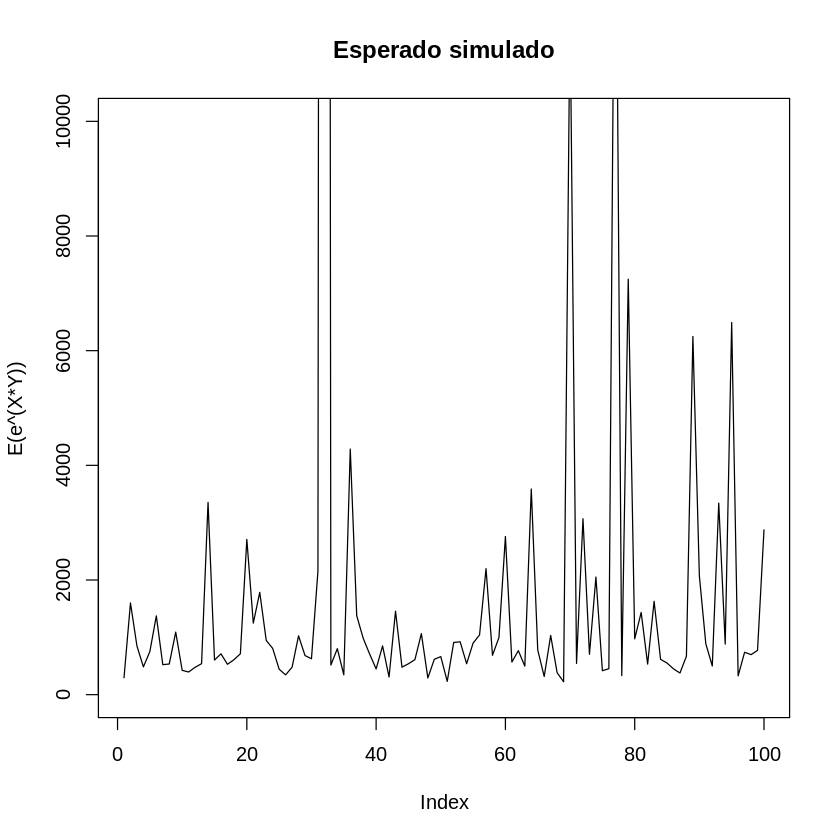

In [ ]:
controlv <- function(m){
  u1<- runif(m)
  u2<- runif(m)
  X <- qnorm( u1 , mean = 1, sd = 1)
  Y <- qnorm( u2 , mean = 1, sd = 1)
  
  c <- -cov(exp(X*Y),exp(X))/var(exp(X))
  E <- mean( exp(X*Y) ) + c * (mean(exp(X))- exp(3/2))
  
  return(E)
}
e2 <- replicate(100,controlv(1000000))

plot(e2, type="l",ylim=c(0,10000), main = "Esperado simulado", ylab = "E(e^(X*Y))")




---


Se tiene que de igual manera con la variable de control aun se tuvo una varianza grande por lo que posiblemente la integral puede ser no convergente:

In [ ]:
var(e2)

[1] 111317313